# Multivariate linear regresion


In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
pip install scikit-learn

## 1.1 Normal equation (Numpy version)

theta =  [ 7. 15. -6.]
y predict =  [13.]
data =  [(0, 1), (2, 1), (3, 4)]


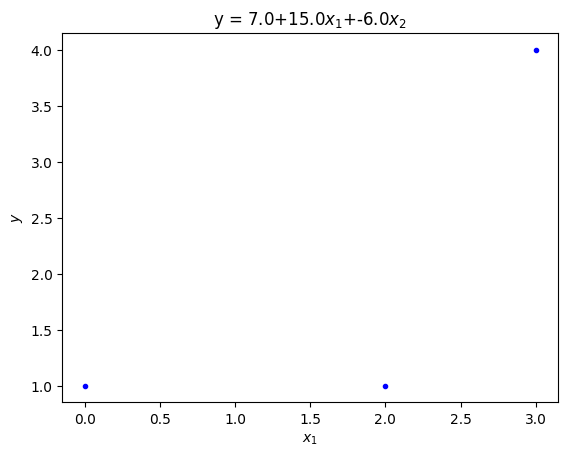

In [1]:
import numpy as np
np.set_printoptions(precision=2)
from sklearn.datasets import make_regression

#x, y = make_regression(n_samples=10, n_features=2, noise=2, random_state=123)
#x = np.array([[0,2,3],[1,6,8]]).T
x = np.array([[0,1],[2,6],[3,8]]) #x1, x2
y = np.array([1,1,4])

x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta = np.linalg.pinv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta)

#predict trainned x
xtest = np.array([[4,9]])
xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
y_p = xtest_b.dot(theta)
print("y predict = ",y_p)

import matplotlib.pyplot as plt

#Create the title
exp = ""
plus = "+"
for t in range(len(theta)):
  if t == len(theta)-1:
    plus = ""
  if t == 0:
    xterm = ""
  else:
    xterm = r"$x_"+str(t)+"$"
  exp += str(np.round(theta[t],2)) + xterm + plus
#end create the title

plt.title("y = "+exp)
data = sorted(zip(x[:,0],y))
print("data = ", data)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val, y_val, "b.")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')

plt.show()


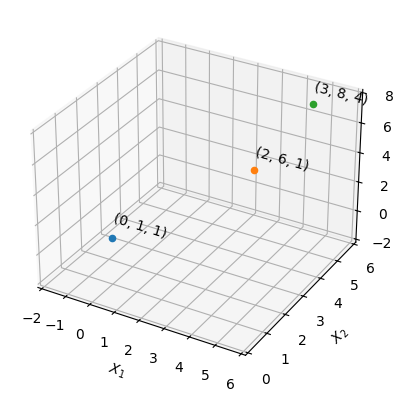

In [2]:
ax = plt.figure().add_subplot(projection='3d')

xs = x[:,0]
ys = x[:,1]
zs = y

for x1, x2, _y in zip(xs, ys, zs):
  label = '(%d, %d, %d)' % (x1, x2, _y)
  ax.text(x1, x2, _y, label, 'x')
  ax.scatter(x1, x2, zs=_y)

ax.set_xlim(-2, 6)
ax.set_ylim(0, 6)
ax.set_zlim(-2, 8)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_zlabel('Y')

plt.show()

Exercise1 <br>
1.1 Change a number of features to 4 (x1,x2,x3,x4) and plot 4 graphs </br>
1.2 Change a number of features to 2 (x1,x2) and use plotly to plot 3D visualization (x1,x2,y).

# **Sklearn**

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)

#prediction
y_p = lin_reg.predict(xtest)
print("y predict = ",y_p)

6.999999999999989  ,  [15. -6.]
y predict =  [13.]


# **Batch Gradient descent (Multiple linear regression)**


In [14]:
def cost_function(theta, x, y, N):
  y_hat = x.dot(theta)
  c = (1/(2*N))*np.sum((y_hat-y)**2)
  return c

In [15]:
x


array([[0, 1],
       [2, 6],
       [3, 8]])

In [16]:
x_b

array([[1., 0., 1.],
       [1., 2., 6.],
       [1., 3., 8.]])

In [24]:
def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  N = x.shape[0] # number of samples
  print("Num of data = ",N)

  # initial theta
  theta =  np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J = cost_function(theta, x, y, N)
  print("First J = ",J)

  # Iterate Loop
  while not converged:

    y_hat = x.dot(theta)
    diff = y_hat - y
    grad = x.T.dot(diff)

    theta = theta - alpha * (1/N) * (grad)

    assert theta.shape == (3,1) #This line makes sure that the shape of theta is still be the same.

    # error
    J2 = cost_function(theta, x, y, N)

    if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True

    J = J2   # update error s
    iter += 1  # update iter

    if iter == max_iter:
        print('       Max iterations exceeded!')
        converged = True

  #print("End converged iter = ",iter)
  return theta

In [18]:
if __name__ == '__main__':

  print("start main")
  print(x_b.shape)
  y = y.reshape(-1,1)
  print(y.shape)

  alpha = 0.01 # learning rate
  #Training process
  theta = gradient_descent(alpha, x_b, y, ep=0.000000000001, max_iter=1000000)
  print ("Theta = ", theta)

  #predict trainned x
  xtest = np.array([[4,9]])
  xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
  y_p = xtest_b.dot(theta)
  print("y predict = ",y_p)



start main
(3, 3)
(3, 1)
Num of data =  3
Init theta.shape =  (3, 1)
First J =  0.4898837560703347
       Converged, iterations:  277953 / 1000000
Theta =  [[ 7.]
 [15.]
 [-6.]]
y predict =  [[13.]]


In [25]:
np.random.random((x_b.shape[1], ))

array([0.82, 0.31, 0.16])

# Stochastic GD
## Your turn :)

In [37]:
def stochastic_gradient_descent(alpha, x, y, ep=0.001, max_iter=10000000):

    N = x.shape[0]  # Number of samples
    print("Number of data = ", N)

    # Initial theta
    theta = np.random.random((x.shape[1], ))

    # Track cost function values
    costs = []
    J = cost_function(theta, x, y, N)
    costs.append(J)

    for iter in range(max_iter):
        # Shuffle data
        x_y = np.hstack((x, y.reshape(-1, 1)))
        np.random.shuffle(x_y)
        x_shuffled = x_y[:, :-1]
        y_shuffled = x_y[:, -1].reshape(-1, 1)

        for i in range(N):
            y_hat = x_shuffled[i].dot(theta)
            diff = y_hat - y_shuffled[i]
            grad = x_shuffled[i] * diff

            # Update theta
            theta -= alpha * grad

            # Compute and record cost
            J2 = cost_function(theta, x, y, N)
            costs.append(J2)

            # Learning rate decay
            alpha /= (1 + 0.0000000001 * iter)

            # Check convergence based on cost function change
            if abs(J - J2) < ep:

                # Plotting the cost function
                plt.plot(costs[-10000:])
                plt.xlabel('Iterations')
                plt.ylabel('Cost')
                plt.title('Cost Function Progress')
                plt.show()
                print(f"Converged based on cost change, iterations: {iter}/{max_iter}")
                return theta
                break

            J = J2

    print('       Max iterations exceeded!')

Number of data =  3


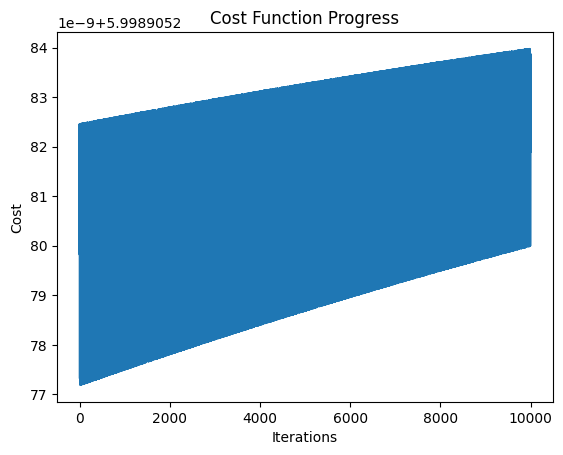

Converged based on cost change, iterations: 283086/1000000
theta: [ 7.   14.99 -6.  ]


In [36]:
theta = stochastic_gradient_descent(alpha=0.01, x=x_b, y=y, ep=0.0000000001, max_iter=1000000)
print(f"theta: {theta}")

# Mini-batch GD (size = 10)
## Your turn :)

In [44]:
def mini_batch_gradient_descent(alpha, x, y, batch_size=10, ep=0.001, max_iter=10000):
    N = x.shape[0]
    m = x.shape[1]
    converged = False
    iter = 0

    # Initialize theta
    theta = np.random.random((m, 1))
    print("Init theta.shape = ", theta.shape)

    # Initialize cost history
    cost_history = []

    # Total error, J(theta)
    J = cost_function(theta, x, y, N)
    cost_history.append(J)
    print("First J = ", J)

    while not converged:
        # Shuffle data
        indices = np.arange(N)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        # Mini-batch gradient descent
        for start in range(0, N, batch_size):
            end = min(start + batch_size, N)
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Compute predictions and gradient
            y_hat = x_batch.dot(theta)
            diff = y_hat - y_batch
            grad = x_batch.T.dot(diff) / batch_size

            # Update parameters
            theta = theta - alpha * grad

            # Ensure theta has the correct shape
            assert theta.shape == (m, 1)

        # Compute error
        J2 = cost_function(theta, x, y, N)
        cost_history.append(J2)

        if abs(J - J2) <= ep:
            print("       Converged, iterations: ", iter, "/", max_iter)
            converged = True

        J = J2  # update error
        iter += 1  # update iteration

        if iter == max_iter:
            print('       Max iterations exceeded!')
            converged = True

    # Plot cost history
    plt.plot(cost_history, 'b-')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function vs. Iterations')
    plt.show()

    return theta

Init theta.shape =  (2, 1)
First J =  1.450177835840471
       Converged, iterations:  23 / 10000


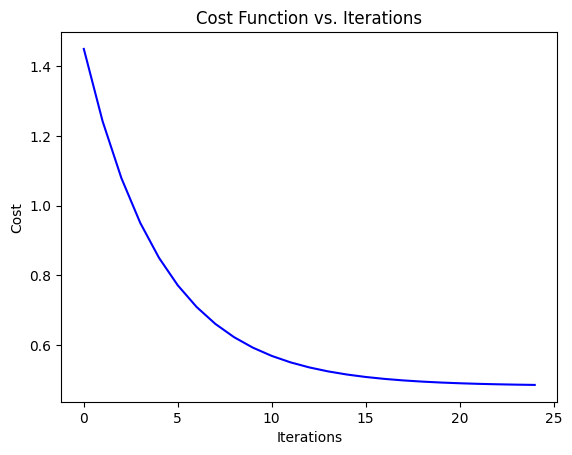

Optimized Theta:  [[0.34]
 [0.28]]


In [45]:
theta_optimal = mini_batch_gradient_descent(alpha, x, y, batch_size=10, ep=0.001, max_iter=10000)
print("Optimized Theta: ",theta_optimal)

# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week03-MLR/Position_Salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(df.head())

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(y)
# Visualizing the Linear Regression results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='green')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [ ]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))